# Sentiment Analysis of TripAdvisor Hotel reviews

### Import and install required packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

C:\Users\karen\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
! pip install textblob

In [3]:
! pip install wordcloud

In [4]:
from textblob import TextBlob as TB
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import warnings
warnings.filterwarnings('ignore') 

### Exploration

In [5]:
df = pd.read_csv("./tripadvisor_hotel_reviews.csv")

In [6]:
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [7]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [9]:
df.dtypes.value_counts()


object    1
int64     1
dtype: int64

In [10]:
df.sample(10)

,Review,Rating
11525,great hotel girlfriend stayed westin august 20...,5
4155,"stop complaining wonderful, life wonderful tim...",5
5359,"just okay stay just okay, quite poor star hote...",2
12906,"amazing holiday, stayed april 24th-8th may.hot...",5
5449,great worth visit original booking minute.com ...,5
15309,good hotel good location stayed 4 nights septe...,4
17838,"great place stay great place stay venice, clos...",5
14911,great rooms fantastic service just got barcelo...,5
18094,"great value hotel, got great non-changeable ra...",4
12492,horrible experience say agree reviews below.th...,1


In [11]:
df.duplicated().sum()

0

In [22]:
#Checking for missing values
df.isnull().sum()

Review       0
Rating       0
Sentiment    0
dtype: int64

**No duplicates neither missing values**

### Structuring the data (Sentiment Analysis)

The next thing we'll do is use the TextBlob library. 

It's a Python tool that helps with understanding text. TextBlob is nice because it's easy to use, but it can do some pretty fancy stuff with text. One thing it does is it tells you if a sentence is positive or negative. It uses numbers between -1 and 1 for this, where -1 means very negative and 1 means very positive (with polarity). It also looks at words like "not" that can change the meaning. TextBlob can also tell you if a sentence is more personal opinion or just facts (with subjectivity). It uses a number between 0 and 1 for this. A higher number means it's more about someone's opinion. TextBlob also checks how strong a word's effect is on the next word. In English, words like "very" or "really" can make a big difference.

We picked TextBlob because it's user-friendly and can handle complex text tasks easily. While NLTK and spaCy are awesome too, TextBlob is simpler and doesn't need as much code to do things with text. It's perfect to quickly analyze text sentiment (whether it's positive or negative) or figure out how opinionated a piece of text is. Plus, it's got some neat features like recognizing emojis and figuring out how strong a word's effect is on the next word.

In [14]:
#Test textblob on the first review

first_line=df['Review'].iloc[0]
print(first_line)

nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  


In [15]:
text = TB(first_line)
text.sentiment

Sentiment(polarity=0.20874404761904758, subjectivity=0.687)

It tells us that the review has a very slightly positive sentiment (polarity = 0.2) and more of a personal opinion (subjectivity = 0.7).

 Now we'll apply it to the dataset, to get the sentiment of each review.

In [17]:
df['Sentiment'] = df['Review'].apply(lambda x: (TB(x).sentiment.polarity))
df.sample(10)

,Review,Rating,Sentiment
7261,excellent choice comfortable clean quiet well-...,5,0.232328
6198,"great stay, great hotel, stayed kealohilani to...",4,0.387698
11444,"amazing loved loved loved, wish sleep westin b...",5,0.522222
10564,loved preview wife couple requirements hotels ...,5,0.379625
146,"surprising enjoyable stay, 3 hotels stayed tri...",4,0.126136
16041,good airport hotel booked hotel early departur...,2,0.193403
15766,heaven earth place truly amazing possibly best...,5,0.210556
15591,fabulous hotel wow city just returned trip hon...,5,0.386429
17097,"loved gran bahia, stayed gran bahia principe a...",5,0.214275
16585,absolutely best reading poor reviews hotel uns...,4,0.413636


We've got the sentiment scores (polarity) for our reviews. But it is not enough to train our model effectively, we need to go a step further and categorize these scores into either 'positive' or 'negative' to feed them into our classification algorithm. To make this happen, we'll craft a function called "**score_to_sentiment_category**". This function will categorize the scores based on a scale ranging from -1 to 1. Scores falling between -1 and less than 0 will be labelled as negative, while a score of 0 will be seen as neutral. Scores greater than 0 up to 1 will be classified as positive."

In [18]:
def score_to_sentiment_category(score):
    if -1 <= score < 0:
        return 'negative'
    if score == 0:
        return 'neutral'
    if 0 < score <= 1:
        return 'positive'

In [19]:
#We apply our previous function to'Sentiment' column

df.Sentiment = df.Sentiment.apply(score_to_sentiment_category)
df.sample(10)

,Review,Rating,Sentiment
14405,second stay fabulous second time staying antic...,5,positive
7715,new favorite husband stayed nights pleasant ho...,5,positive
8297,dont expect stayed maritim hotel july 18-22 20...,3,positive
19508,great resort food needs help resort absolutely...,3,positive
389,princess pea arrived hour check-in waiting 15 ...,2,negative
15098,best location average hotel live china novotel...,4,positive
11452,not terrible not great westin husband stayed w...,2,positive
19673,wonderful stay stayed westin beijing month boy...,5,positive
8898,renaissance rocked great hotel central locatio...,5,positive
3569,"heaven funeral, stunningly beautiful resort, b...",5,positive


From the dataframe, we can see our function worked and we have a labelled dataset representing sentiment, categorized as 'positive' or 'negative

In [23]:
#Viewing the number of times each category appears in the 'Sentiment' column
df['Sentiment'].value_counts()

positive    19112
negative     1356
neutral        23
Name: Sentiment, dtype: int64

The dataset seem highly imbalanced, let's visualize it:

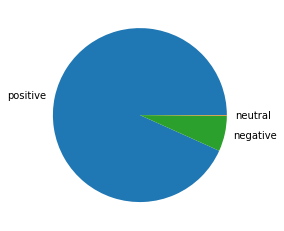

In [28]:
f = np.array([19112, 1356, 23])
mylabels = ['positive', 'negative', 'neutral']

colors = ['#1f77b4', '#2ca02c', '#ff7f0e']

plt.pie(f, labels = mylabels, colors=colors)
plt.show() 

In [29]:
# Counts of reviews
positive_count = 19112
negative_count = 1356
neutral_count = 23

# Total number of reviews
total_reviews = positive_count + negative_count + neutral_count

# Calculate percentages
positive_percentage = (positive_count / total_reviews) * 100
negative_percentage = (negative_count / total_reviews) * 100
neutral_percentage = (neutral_count / total_reviews) * 100

# Print percentages
print("Percentage of positive reviews:", positive_percentage, "%")
print("Percentage of negative reviews:", negative_percentage, "%")
print("Percentage of neutral reviews:", neutral_percentage, "%")


Percentage of positive reviews: 93.27021619247475 %
Percentage of negative reviews: 6.6175394075447755 %
Percentage of neutral reviews: 0.11224439998047925 %


We have about 93% percent of reviews as positive, about 6.6% percent of reviews as negative and about 0.1% of reviews as neutral, we can see there is a clear imbalance in the label, as we have positive sentiment accounting for almost all the observations.

Let's move on to feature selection, the imbalanced dataset will be handled with an imbalanced classifier that will balance our dataset